# CSG Result Analysis

### Open Ideas:

I think we should also test how nesting more and more geometries affects the overall time. In theory, the naive way, for k nested elements then the complexity should be $2n^k$ since more for loops get concatenated into each other, and 2 for the geomtries.


## Introduction

This notebook is a breakdown of results gathered from running tests on the implementation of the Combinatorial Geometry method in the OpenRT library. The following sections breakdown the way the tests were conducted and also the flow of the rest of this notebook.


### The 3 Operations

By definition, constructive solid geometry is a method which allows to construct complex geometries using primitive operation and boolean set operations (Union, Difference, Intersection). Therefore, every test requires us to test each of these operations on the same exact load. In theory, the operation itself shouldn't have a drastic impact on the performance of the algorithm.

### The 3 Algorithms

There are 3 variants of the CSG method implemented in OpenRT. The first is the naive and brute force implementation which we refer to as _NaiCSG_. The second is a variant that uses a Binary Space Partition tree in order to solve the visible surface problem but still naivly finds intersections inside the combinatorial geometry, which we will refer to as _BinCSG_. Lastly, we'll introduce our optimized algorithm which uses a binary space partition tree on the outside (solving the visible surface problem) and also inside each composite geometry in order to direct the rays towards the correct geometries, which we will refer to as _OptiCSG_. Every algorithm is checked for each operation - meaning a total of 9 tests are conducted.

### Notebook Breakdown

There are a total of 4 sections (the first being this introduction). Section 2 focuses entirely on extracting data for each alogrithm and only comparing the time of the different operations. Section 3 is focused on processing the data and comparing the mean time of each algorithm to the other. The last section works on modeling the time complexities to close representations and finally drawing conclusion on the performance.  

### Hardware Specifications

All tests were ran on a Macbook Pro 13" 2017

- **Processor:** 2,3 GHz Dual-Core Intel Core i5
- **Memory:** 8 GB 2133 MHz LPDDR3
- **Graphics Card:** Intel Iris Plus Graphics 640 1536 MB

## Geometry Complexity & Rendering Times

### NaiCSG


The naive algorithm essentially by brute-forcing its way through the visible-surface problem. For each ray, it iterates over all geometries in the scene and picks the closest intersection. Therefore if a scene contains 100 geometries and we have a 200x200px image. A total of **4.000.000** intersections will be checked before the image is computed. 


In [1]:
# setting up notebook all modules
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
from functools import reduce

In [2]:
df1 = pd.read_csv('n_primitives_tests/tests_pdp_intersection.txt')
df2 = pd.read_csv('n_primitives_tests/tests_pdp_union.txt')
df3 = pd.read_csv('n_primitives_tests/tests_pdp_difference.txt')

In [3]:
df_normal = pd.concat([df1, df2, df3], axis=1)
df_normal.columns = ["Triangle Number", "Intersection Time", "tris2", "Union Time", "tris3", "Difference Time"]
df_normal = df_normal.drop(columns=['tris2', 'tris3'])
col = df_normal.loc[: , "Intersection Time":"Difference Time"]
df_normal['NaiCSG Mean Time'] = col.mean(axis=1)

In [4]:
df_normal

,Triangle Number,Intersection Time,Union Time,Difference Time,NaiCSG Mean Time
0,56,9584,10005,10244,9.944333e+03
1,96,14842,13504,17231,1.519233e+04
2,108,19609,15103,27751,2.082100e+04
3,160,23874,21834,34702,2.680333e+04
4,176,24185,23850,34382,2.747233e+04
...,...,...,...,...,...
84,16016,2358169,2185245,2616391,2.386602e+06
85,16560,2325892,2249876,2661334,2.412367e+06
86,16740,2468460,2281268,2728314,2.492681e+06
87,17296,2827311,2477078,2849404,2.717931e+06


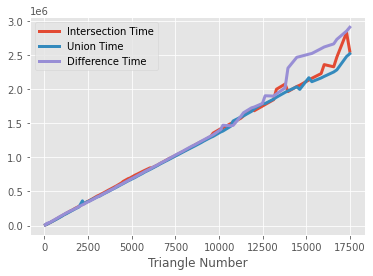

In [5]:
df_normal.plot(x ='Triangle Number', y=['Intersection Time', 'Union Time', 'Difference Time'], kind = 'line', lw=3)
plt.show()

# step size in triangles grow exponentiall; therefore the bar chart shows different results than the scaled one below here.

### BinCSG

In [6]:
bsp1 = pd.read_csv('n_primitives_tests/tests_bsp_pdp_intersection.txt')
bsp2 = pd.read_csv('n_primitives_tests/tests_bsp_pdp_union.txt')
bsp3 = pd.read_csv('n_primitives_tests/tests_bsp_pdp_difference.txt')

In [7]:
df_bsp = pd.concat([bsp1, bsp2, bsp3], axis=1)
df_bsp.columns = ["Triangle Number", "Intersection Time", "tris2", "Union Time", "tris3", "Difference Time"]
df_bsp = df_bsp.drop(columns=['tris2', 'tris3'])
col2 = df_bsp.loc[: , "Intersection Time":"Difference Time"]
df_bsp['BinCSG Mean Time'] = col2.mean(axis=1)

In [8]:
df_bsp

,Triangle Number,Intersection Time,Union Time,Difference Time,BinCSG Mean Time
0,56,787,1269,1208,1.088000e+03
1,96,1410,2160,4186,2.585333e+03
2,108,1531,2332,3368,2.410333e+03
3,160,1909,3170,5206,3.428333e+03
4,176,2036,3380,3362,2.926000e+03
...,...,...,...,...,...
193,79200,941104,1541728,1231117,1.237983e+06
194,79596,912189,1549889,1145179,1.202419e+06
195,80800,927021,1662735,1149373,1.246376e+06
196,81200,939500,1622445,1167704,1.243216e+06


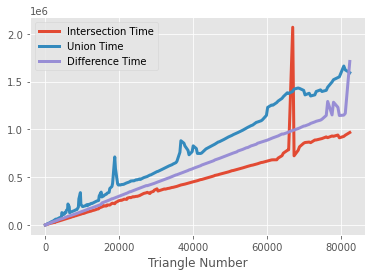

In [9]:
df_bsp.plot(x ='Triangle Number', y=['Intersection Time', 'Union Time', 'Difference Time'], kind = 'line', lw=3)
plt.show()

### OptimCSG

In [10]:
optim1 = pd.read_csv('n_primitives_tests/tests_bsp_optim_intersection.txt')
optim2 = pd.read_csv('n_primitives_tests/tests_bsp_optim_union.txt')

In [11]:
df_optim = pd.concat([optim1, optim2], axis=1)
df_optim.columns = ["Triangle Number", "Intersection Time", "tris2", "Union Time"]
df_optim = df_optim.drop(columns=['tris2'])
col3 = df_optim.loc[: , "Intersection Time":"Union Time"]
df_optim['OptiCSG Mean Time'] = col3.mean(axis=1)

In [12]:
df_optim

,Triangle Number,Intersection Time,Union Time,OptiCSG Mean Time
0,56,1005,943,974.0
1,96,1065,1263,1164.0
2,108,859,1073,966.0
3,160,1019,1262,1140.5
4,176,927,1175,1051.0
...,...,...,...,...
193,79200,1364,1632,1498.0
194,79596,1415,1691,1553.0
195,80800,1467,1728,1597.5
196,81200,1434,1705,1569.5


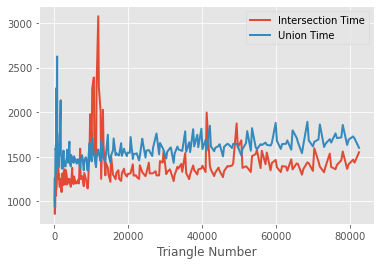

In [13]:
df_optim.plot(x ='Triangle Number', y=['Intersection Time', 'Union Time'], kind = 'line', lw=2)
plt.show()

## Algorithm Comparasion

In [14]:
df_comp = pd.concat([df_normal["Triangle Number"], df_normal["NaiCSG Mean Time"], df_bsp[0:len(df_normal.index)]["BinCSG Mean Time"], df_optim[0:len(df_normal.index)]["OptiCSG Mean Time"]], axis=1)
df_comp['NaiCSG Rolling Mean'] = df_comp['NaiCSG Mean Time'].rolling(7).mean()
df_comp['BinCSG Rolling Mean'] = df_comp['BinCSG Mean Time'].rolling(7).mean()
df_comp['OptiCSG Rolling Mean'] = df_comp['OptiCSG Mean Time'].rolling(7).mean()



In [15]:
df_comp

,Triangle Number,NaiCSG Mean Time,BinCSG Mean Time,OptiCSG Mean Time,NaiCSG Rolling Mean,BinCSG Rolling Mean,OptiCSG Rolling Mean
0,56,9.944333e+03,1088.000000,974.0,NaN,NaN,NaN
1,96,1.519233e+04,2585.333333,1164.0,NaN,NaN,NaN
2,108,2.082100e+04,2410.333333,966.0,NaN,NaN,NaN
3,160,2.680333e+04,3428.333333,1140.5,NaN,NaN,NaN
4,176,2.747233e+04,2926.000000,1051.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
84,16016,2.386602e+06,250487.666667,1496.5,2.240101e+06,232783.571429,1461.857143
85,16560,2.412367e+06,256954.666667,1382.5,2.287473e+06,240253.238095,1447.428571
86,16740,2.492681e+06,264765.666667,1428.5,2.332296e+06,248032.904762,1428.500000
87,17296,2.717931e+06,270377.000000,1433.0,2.409780e+06,253782.333333,1430.928571


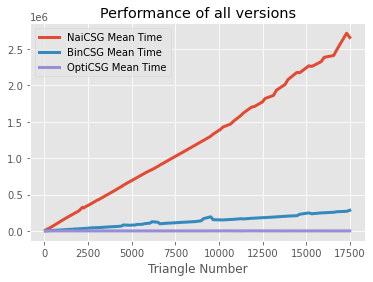

In [16]:
df_comp.plot(x="Triangle Number", y=["NaiCSG Mean Time", "BinCSG Mean Time", "OptiCSG Mean Time"], kind="line", lw=3)
plt.title('Performance of all versions')
plt.show()

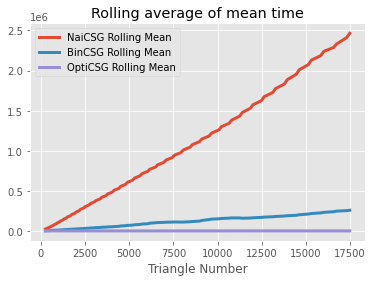

In [17]:
df_comp.plot(x="Triangle Number", y=["NaiCSG Rolling Mean", "BinCSG Rolling Mean", "OptiCSG Rolling Mean"], kind="line", lw=3)
plt.title("Rolling average of mean time")
plt.show()

# 1. Change the plot to remove the first line
# 2. Wrap the scene in the sphere and run the tests with the spheres inside there.

## Number of Nests

### NaiCSG


In [18]:
nest_1 = pd.read_csv('n_nests_tests/nesting_base_union.txt', header=None)
nest_2 = pd.read_csv('n_nests_tests/nesting_optim_union.txt', header=None)

nest_viewport = pd.read_csv('n_nests_tests/nest_to_viewport.txt', header=None)

In [19]:
df_nest = pd.concat([nest_1, nest_2, nest_viewport], axis=1)
df_nest.columns = ["Triangle Number", "Number of Nests", "Base Time", "tris2", "nests2", "Optim Time", "nests3", "Viewport Fill"]
df_nest = df_nest.drop(columns=['tris2', 'nests2', 'nests3'])

mean_viewport_fill = df_nest['Viewport Fill'].mean()
print(mean_viewport_fill)

71.62352430555556


In [20]:
df_nest

,Triangle Number,Number of Nests,Base Time,Optim Time,Viewport Fill
0,1584,1,237058,4643,73.893750
1,2112,2,325202,6850,71.104427
2,2640,3,381395,7448,68.207335
3,3168,4,455960,8604,69.424826
4,3696,5,529122,9709,70.639583
5,4224,6,599498,11480,70.996875
6,4752,7,674182,12048,69.498872
7,5280,8,758413,11278,70.820095
8,5808,9,826069,12916,72.025998
9,6336,10,899317,13431,72.565755


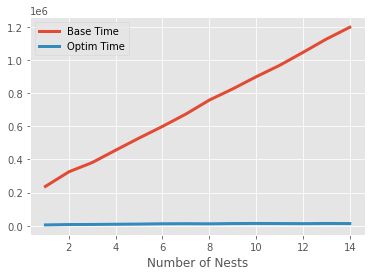

In [21]:
df_nest.plot(x ='Number of Nests', y=['Base Time', 'Optim Time'], kind = 'line', lw=3)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9ac4dee6-3593-4df6-9be3-dcc2fad09905' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>